In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def load_data(file_path):
    """Loads CSV data and returns NumPy array."""
    df = pd.read_csv(file_path)
    return df.values

In [3]:
def normalize_data(x):
    """Normalizes data using mean and standard deviation."""
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)


In [4]:
def compute_gaussian_params(x):
    """Computes mean and variance for Gaussian distribution."""
    mean = np.mean(x, axis=0)
    var = np.var(x, axis=0) + 1e-8  # Add small value to prevent division by zero
    return mean, var

In [5]:
def gaussian_probability(x, mean, var):
    """Computes probability using Gaussian distribution."""
    p = (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x - mean) ** 2) / (2 * var))
    return np.prod(p, axis=1)  # Combine probabilities for multivariate case


In [6]:
def detect_anomalies(x, epsilon):
    """Detects anomalies based on probability threshold (epsilon)."""
    mean, var = compute_gaussian_params(x)
    p = gaussian_probability(x, mean, var)
    threshold = np.percentile(p, epsilon * 100)  # Dynamic thresholding
    return np.where(p < threshold)[0]  # Return indices of anomalies


In [7]:
def plot_anomalies(x, anomalies):
    """Plots normal points and detected anomalies."""
    plt.scatter(x[:, 0], x[:, 1], label='Normal', alpha=0.5)
    plt.scatter(x[anomalies, 0], x[anomalies, 1], color='r', label='Anomalies')
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Anomaly Detection')
    plt.show()

In [8]:
def train_and_detect(file_path, epsilon=0.05):
    """Loads data, detects anomalies, and plots results."""
    x = load_data(file_path)
    x = normalize_data(x)
    anomalies = detect_anomalies(x, epsilon)
    print(f"Detected {len(anomalies)} anomalies")
    plot_anomalies(x, anomalies)


Detected 16 anomalies


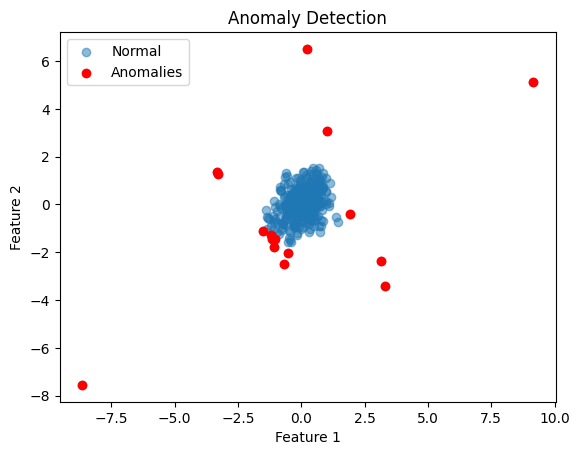

In [9]:
train_and_detect(r"C:\Users\user\Downloads\cv_server_data.csv")